#### Clase 11/07/2023

Ejemplo:

Valor esperado en seguros

Seguros de vehículo

Accidente | Probabilidad | Costo 
----------|--------------|--------
Pérdida total | 1/1000   | $ \$ 70.000.000 $
Pérdida parcial | 5/100  | $ \$ 35.000.000 $
Pérdida menor | 3/10     | $ \$ 10.000.000 $
Sin accidente | resto    | $ \$ 0 $

¿Cuánto le paga en promedio la aseguradora a un cliente?

Ayuda = Calcular un valor esperado

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
P = np.array([1/1000, 5/100, 3/10, 0.649])
P

array([0.001, 0.05 , 0.3  , 0.649])

In [12]:
1 - P[:3].sum()

0.649

In [13]:
P.sum()

1.0

In [14]:
x = np.array([70*10**6, 35*10**6, 10**7, 0])
x

array([70000000, 35000000, 10000000,        0])

In [15]:
x*P

array([  70000., 1750000., 3000000.,       0.])

In [17]:
valor_esperado = (x*P).sum()
valor_esperado

4820000.0

El valor promedio pagado a cada cliente es de $ \$ 4.820.000 $ por año, se calcula como el valor esperado a pagar.

Suponiendo que la aseguradora tiene 5.000 clientes

In [18]:
clientes = 5000
print(f'En promedio la aseguradora le paga a los clientes {clientes * valor_esperado}')

En promedio la aseguradora le paga a los clientes 24100000000.0


Si la aseguradora cobra a cada cliente un seguro anual de $ \$ 5.000.000 $

In [22]:
prima_anual = 6000000
print(f'El banco factura {clientes * prima_anual}')
print(f'Las ganancias anuales serían {(clientes * prima_anual) - clientes * valor_esperado}')

El banco factura 30000000000
Las ganancias anuales serían 5900000000.0


Seguros de vehículo

Accidente | Probabilidad | Costo 
----------|--------------|--------
Pérdida total | 1/1000   | $ \$ 70.000.000 $
Pérdida parcial | 5/100  | $ \$ 35.000.000 $
Pérdida menor | 3/10     | $ \$ 10.000.000 $
Sin accidente | 0.649    | $ \$ 0 $

In [24]:
np.random.rand()

0.883649406144788

In [25]:
P = np.array([1/1000, 5/100, 3/10, 0.649])

In [26]:
P.cumsum() # Sumatoria acumulada

array([0.001, 0.051, 0.351, 1.   ])

In [48]:
resultado = ['Pérdida Total', 'Pérdida Parcial', 'Pérdida menor', 'Sin accidente']
def accidente():
    r = np.random.rand()
    if r <= 0.001:
        print(resultado[0])
    elif r <= 0.051:
        print(resultado[1])
    elif r <= 0.351:
        print(resultado[2])
    else:
        print(resultado[3])

In [49]:
accidente()

Sin accidente


In [124]:
y = [0, 0, 0, 0]

In [125]:
def accidente2():
    r = np.random.rand()
    if r <= 0.001:
        y[0] += 1
    elif r <= 0.051:
        y[1] += 1
    elif r <= 0.351:
        y[2] += 1
    else:
        y[3] += 1

In [126]:
accidente2()
y

[0, 0, 1, 0]

In [151]:
y = [0, 0, 0, 0]
for _ in range(clientes):
    accidente2()
print(y)
y = np.array(y)
print(f'Pago pomedio por cliente {((y/clientes)*x).sum()}')

[6, 272, 1503, 3219]
Pago pomedio por cliente 4994000.0


In [143]:
y = np.array(y)
print(y.sum())
y/clientes

5000


array([0.0014, 0.0474, 0.3044, 0.6468])

In [142]:
(y/clientes)*x

array([  98000., 1659000., 3044000.,       0.])

In [141]:
valor_esperado2 = ((y/clientes)*x).sum()
valor_esperado2

4801000.0

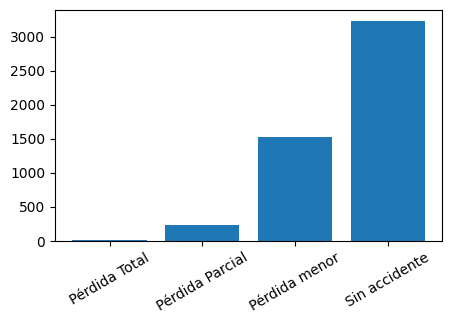

In [134]:
plt.figure(figsize= (5,3))
plt.bar(resultado, y)
plt.xticks(rotation = 30) # Ajustamos propiedades de las etiquetas del eje horizontal
plt.show()

In [166]:
iteraciones = 10**4
clientes = 5000
predicciones = []

for _ in range(iteraciones):
    y = [0, 0, 0, 0]
    for _ in range(clientes):
        accidente2()    
    y = np.array(y)
    predicciones.append(((y/clientes)*x).sum())

In [167]:
predicciones = np.array(predicciones)
predicciones.mean()

4821124.7

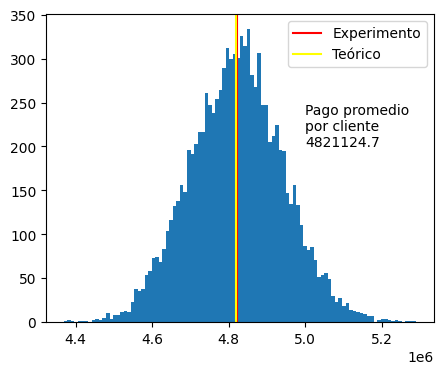

In [168]:
plt.figure(figsize= (5,4))
plt.hist(predicciones, bins= 100)
plt.axvline(predicciones.mean(), color = 'red', label = f'Experimento')
plt.axvline(4820000, color = 'yellow', label = 'Teórico')
plt.text(5000000, 200, f'Pago promedio\npor cliente\n{predicciones.mean()}')
plt.legend()
plt.show()